# BCT with ANOVA

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import pandas as pd
import numpy as np
import torch
if not torch.cuda.is_available():
    quit()
else:
    print("Cuda capable device found!")
import matplotlib.pyplot as plt

Cuda capable device found!


In [2]:
ds_selector='.\\datasets\\kaggle DDoS Dataset\\small'

In [3]:
csv_files = []
for dirname, _, filenames in os.walk(ds_selector):
    for filename in filenames:
        csv_file = os.path.join(dirname, filename)
        csv_files.append(csv_file)
csv_files

['.\\datasets\\kaggle DDoS Dataset\\small\\final.csv']

In [4]:
if len(csv_files) > 1:
    df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
else:
    df=pd.read_csv(csv_files[0])
    
df.columns = df.columns.str.strip()
print("Original length of df:", len(df))

Original length of df: 1000000


In [5]:
#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 85 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1000000 non-null  int64  
 1   Flow ID            1000000 non-null  object 
 2   Src IP             1000000 non-null  object 
 3   Src Port           1000000 non-null  int64  
 4   Dst IP             1000000 non-null  object 
 5   Dst Port           1000000 non-null  int64  
 6   Protocol           1000000 non-null  int64  
 7   Timestamp          1000000 non-null  object 
 8   Flow Duration      1000000 non-null  int64  
 9   Tot Fwd Pkts       1000000 non-null  int64  
 10  Tot Bwd Pkts       1000000 non-null  int64  
 11  TotLen Fwd Pkts    1000000 non-null  float64
 12  TotLen Bwd Pkts    1000000 non-null  float64
 13  Fwd Pkt Len Max    1000000 non-null  float64
 14  Fwd Pkt Len Min    1000000 non-null  float64
 15  Fwd Pkt Len Mean   1000000 non-nu

In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print("After dropping NaNs, the length of df:", len(df))

After dropping NaNs, the length of df: 1000000


In [7]:
df_copy=df.copy()
df_copy.Label.value_counts()

ddos      500000
Benign    500000
Name: Label, dtype: int64

C:\Users\MAX\AppData\Local\Temp\ipykernel_27412\3788501913.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df_copy.corr()


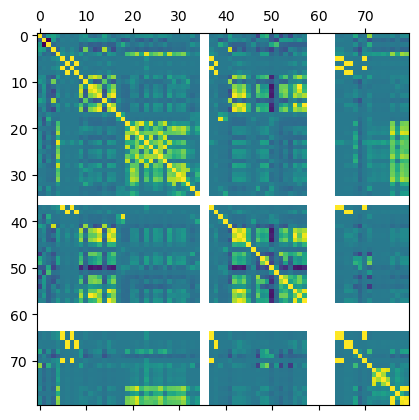

In [8]:
corr_mat=df_copy.corr()
plt.matshow(corr_mat)
plt.show()

In [9]:
cols=df_copy.columns.to_list()
#cols.sort()
cols

['Unnamed: 0',
 'Flow ID',
 'Src IP',
 'Src Port',
 'Dst IP',
 'Dst Port',
 'Protocol',
 'Timestamp',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pk

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

f:\miniconda\envs\dl\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
df_copy.drop(['Unnamed: 0','Timestamp','Protocol','Flow ID','Src IP','Dst IP'], axis=1, inplace=True)

In [12]:
cols=df_copy.columns.to_list()
len(cols)

79

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

X=df_copy.drop(['Label'], axis=1)
Y=df_copy['Label']

fvalue_Best = SelectKBest(f_classif, k=20)
X_kbest = fvalue_Best.fit_transform(X, Y)
mask=fvalue_Best.get_support()

print('Remaining columns:')
for m,c in zip(mask, cols):
    if m:
        print(c)

X=X_kbest

f:\miniconda\envs\dl\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [33 34 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
f:\miniconda\envs\dl\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Remaining columns:
Src Port
Dst Port
Flow Duration
Fwd Pkt Len Min
Bwd Pkt Len Min
Fwd IAT Tot
Fwd IAT Max
Bwd IAT Tot
Fwd PSH Flags
Pkt Len Min
SYN Flag Cnt
RST Flag Cnt
PSH Flag Cnt
ACK Flag Cnt
CWE Flag Count
ECE Flag Cnt
Down/Up Ratio
Init Fwd Win Byts
Init Bwd Win Byts
Fwd Seg Size Min


In [14]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, shuffle=True, train_size=0.75)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, shuffle=True, train_size=0.75)
del df_copy,X,Y

trainY=pd.Series(trainY)
valY=pd.Series(valY)

In [15]:
from torch import tensor
from torch.utils.data import Dataset, DataLoader

class NetMetrics(Dataset):
    def __init__(self, X, y, onehot):
        self.x, self.y, self.onehot = X, y, onehot
        self.len=self.x.shape[0]

    def __getitem__(self,index):
        tensor_label=self.onehot[self.y.iloc[index]]
        return tensor(self.x[index], dtype=torch.float32), tensor_label
        
    def __len__(self):
        return self.len

dict_={'ddos' : torch.tensor([1,0], dtype=torch.float32),'Benign': torch.tensor([0,1],dtype=torch.float32)}
ds=NetMetrics(scaler.fit_transform(trainX), trainY, dict_)

## The model

In [16]:
class AttackNet(torch.nn.Module):
    def __init__(self):
        super(AttackNet, self).__init__()
        self.model=torch.nn.Sequential(
            torch.nn.Linear(20, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 128),
            torch.nn.Tanh(),
            torch.nn.Linear(128, 64),
             torch.nn.Tanh(),
            torch.nn.Linear(64, 2),
            #torch.nn.Sigmoid(),
            torch.nn.LogSoftmax(dim=1)
            )

    def forward(self, x):
        return self.model(x)

model = AttackNet()

## Training

In [17]:
device = 'cuda:0' if torch.cuda.is_available() == True else 'cpu'

In [28]:
from matplotlib import pyplot as plt
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

epochs=7
learning_rate = .001
model=model.to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)
loader = DataLoader(dataset=ds, batch_size=100, shuffle=True)

In [27]:
#from torchmetrics.classification import BinaryF1Score

def model_validation(criterion):

    val_tar=[]
    val_pred=[]
    cumulative_L_val=0.

    val_ds = NetMetrics(scaler.transform(testX), testY, dict_)
    #print(len(val_ds))
    val_loader=DataLoader(val_ds, batch_size=100, shuffle=False)

    model.eval()

    with torch.no_grad():
        for inputs, ground_truth in val_loader:
            y_tilde = model(inputs.to(device))
            y=ground_truth

            loss_val=criterion(y_tilde, y.to(device))
            cumulative_L_val+=loss_val.item()
            #TODO see shape and correct dim
            #val_tar.append(y)
            #val_pred.append(y_tilde.clone().detach())
    
        #f1=BinaryF1Score()
        #f1_val=f1(tensor(val_pred), tensor(val_tar))

        #print('F1-score Val: ', f1_val)
    
    #return f1_val
    return cumulative_L_val
    

In [29]:
#out=[]
for epoch in range(epochs):
    print("Epoch begin: ", epoch)
    cumulative_L = 0.
    for x,y in loader:
        # reset optimizer
        opt.zero_grad()
        loss = criterion(model(x.to(device)), y.to(device))
        loss.backward()
        opt.step()
        cumulative_L+=loss.item()
    
    writer.add_scalar("Loss/Train", cumulative_L , epoch)
    f1_val=model_validation(criterion)
    writer.add_scalar("Loss/Val", cumulative_L , epoch)
    #out.append(cumulative_L)

writer.close()

#plt.plot(out)

Epoch begin:  0
Epoch begin:  1
Epoch begin:  2
Epoch begin:  3
Epoch begin:  4
Epoch begin:  5
Epoch begin:  6


In [25]:
from datetime import datetime
model_name='.\\models\\' + datetime.now().strftime("%m-%d-%Y_%H-%M-%S")+'__anova_binary.model'
torch.save(model.state_dict(), model_name)

## Test

In [45]:
test_ds = NetMetrics(scaler.transform(testX), testY, dict_)
print(len(test_ds))
test_loader=DataLoader(test_ds, batch_size=100, shuffle=False)

250000


In [46]:
model=AttackNet()
model.load_state_dict(torch.load('.\\models\\12-19-2022_21-02-10__anova_binary.model'))
model=model.to('cpu')

acc = [0]*2
translator={0 : 'ddos', 1 : 'Benign'}
targets=[]
preds=[]

model.eval()

with torch.no_grad():
    for inputs, ground_truth in test_loader:
        prediction = torch.argmax(model(inputs), dim=1)
        targ = torch.argmax(ground_truth, dim=1)

        targets.extend(targ.tolist())
        preds.extend(prediction.clone().detach().tolist())

    for p,t in zip(preds, targets):
        if p == t:
            acc[p]+=1

acc

[124553, 124565]

In [47]:
val_count_test=testY.value_counts()
val_count_test

Benign    125052
ddos      124948
Name: Label, dtype: int64

In [48]:
acc_final=[a/val_count_test[translator[idx]] for idx,a in enumerate(acc)]
print('Per class accuracy: ', acc_final)

Per class accuracy:  [0.9968386848929155, 0.9961056200620542]


Precision:  tensor(0.9968)
Recall:  tensor(0.9961)
F1-score:  tensor(0.9965)
Overall Accuracy:  tensor(0.9965)


<AxesSubplot: >

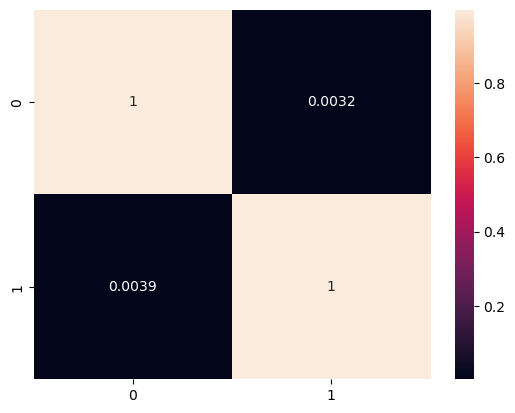

In [49]:
from torchmetrics.classification import BinaryConfusionMatrix, BinaryPrecision, BinaryRecall, BinaryF1Score, BinaryAccuracy

target = torch.tensor(targets)
preds = torch.tensor(preds)
metric = BinaryConfusionMatrix(normalize='true')
res=metric(preds, target)

prec = BinaryPrecision()
print('Precision: ',prec(preds, target))

rec=BinaryRecall()
print('Recall: ', rec(preds, target))

f1=BinaryF1Score()
print('F1-score: ', f1(preds, target))

acc2=BinaryAccuracy()
print('Overall Accuracy: ', acc2(preds, target))

import seaborn as sn
sn.heatmap(res, annot=True)

___